## EDA ON TERRORISM
---------
![](Terrorism.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
 
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The data at a glance:

In [2]:
df = pd.read_csv('global-terrorism.csv')
df.head()

,DATE,YEAR,COUNTRY,STATE,CITY,SUBREGION,REGION,PERPETRATOR,INJURED,DEAD,DESCRIPTION,COORDINATES,CATEGORY
0,02-04-2023,2023,Russia,NaN,Saint Petersburg,Eastern Europe,Europe,Darya Trepova,42.0,1.0,During a speech by military blogger vladlen ta...,"64.6863136,97.7453061",Explosion
1,06-03-2023,2023,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehreek-e-Jihad Pakistan (TJP) or Islamic Stat...,13.0,9.0,"A terrorist attack occurred in bolan, balochis...","24.8546842,67.0207055",Explosion
2,17-02-2023,2023,Pakistan,Sindh,Karachi,Southern Asia,Asia,Tehrik-i-Taliban Pakistan (TTP),16.0,5.0,The 2023 karachi police station attack occurre...,"24.8546842,67.0207055",Assault
3,30-01-2023,2023,Pakistan,Khyber Pakhtunkhwa,Peshawar,Southern Asia,Asia,Jamaat-ul-Ahrar,220.0,101.0,A suicide attacker detonated a bomb during aft...,"34.0123846,71.5787458",Explosion
4,27-01-2023,2023,Israel,Jerusalem District,Jerusalem,Western Asia,Asia,Palestinian Islamic Jihad (PIJ),3.0,7.0,7 people were shot and killed and at least 3 o...,"31.7788242,35.2257626",Assault


In [3]:
df.shape

(27177, 13)

In [4]:
df.columns

Index(['DATE', 'YEAR', 'COUNTRY', 'STATE', 'CITY', 'SUBREGION', 'REGION',
       'PERPETRATOR', 'INJURED', 'DEAD', 'DESCRIPTION', 'COORDINATES',
       'CATEGORY'],
      dtype='object')

In [5]:
#Extracting Necessary Columns
df=df[['YEAR','COUNTRY','STATE','REGION','CITY'
       ,'DEAD','INJURED','DESCRIPTION','CATEGORY']]

In [6]:
df.head()

,YEAR,COUNTRY,STATE,REGION,CITY,DEAD,INJURED,DESCRIPTION,CATEGORY
0,2023,Russia,NaN,Europe,Saint Petersburg,1.0,42.0,During a speech by military blogger vladlen ta...,Explosion
1,2023,Pakistan,Sindh,Asia,Karachi,9.0,13.0,"A terrorist attack occurred in bolan, balochis...",Explosion
2,2023,Pakistan,Sindh,Asia,Karachi,5.0,16.0,The 2023 karachi police station attack occurre...,Assault
3,2023,Pakistan,Khyber Pakhtunkhwa,Asia,Peshawar,101.0,220.0,A suicide attacker detonated a bomb during aft...,Explosion
4,2023,Israel,Jerusalem District,Asia,Jerusalem,7.0,3.0,7 people were shot and killed and at least 3 o...,Assault


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27177 entries, 0 to 27176
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         27177 non-null  int64  
 1   COUNTRY      27177 non-null  object 
 2   STATE        15423 non-null  object 
 3   REGION       21177 non-null  object 
 4   CITY         13151 non-null  object 
 5   DEAD         27176 non-null  float64
 6   INJURED      27172 non-null  float64
 7   DESCRIPTION  27177 non-null  object 
 8   CATEGORY     21582 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.9+ MB


In [8]:
df.describe()

,YEAR,DEAD,INJURED
count,27177.000000,27176.000000,27172.000000
mean,1999.181587,3.091515,6.260489
std,10.290831,30.250605,55.941868
min,1968.000000,0.000000,0.000000
25%,1996.000000,0.000000,0.000000
50%,2003.000000,0.000000,0.000000
75%,2006.000000,1.000000,2.000000
max,2023.000000,2749.000000,5000.000000


### Data analysis and visualization

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'DEAD'}>],
       [<Axes: title={'center': 'INJURED'}>, <Axes: >]], dtype=object)

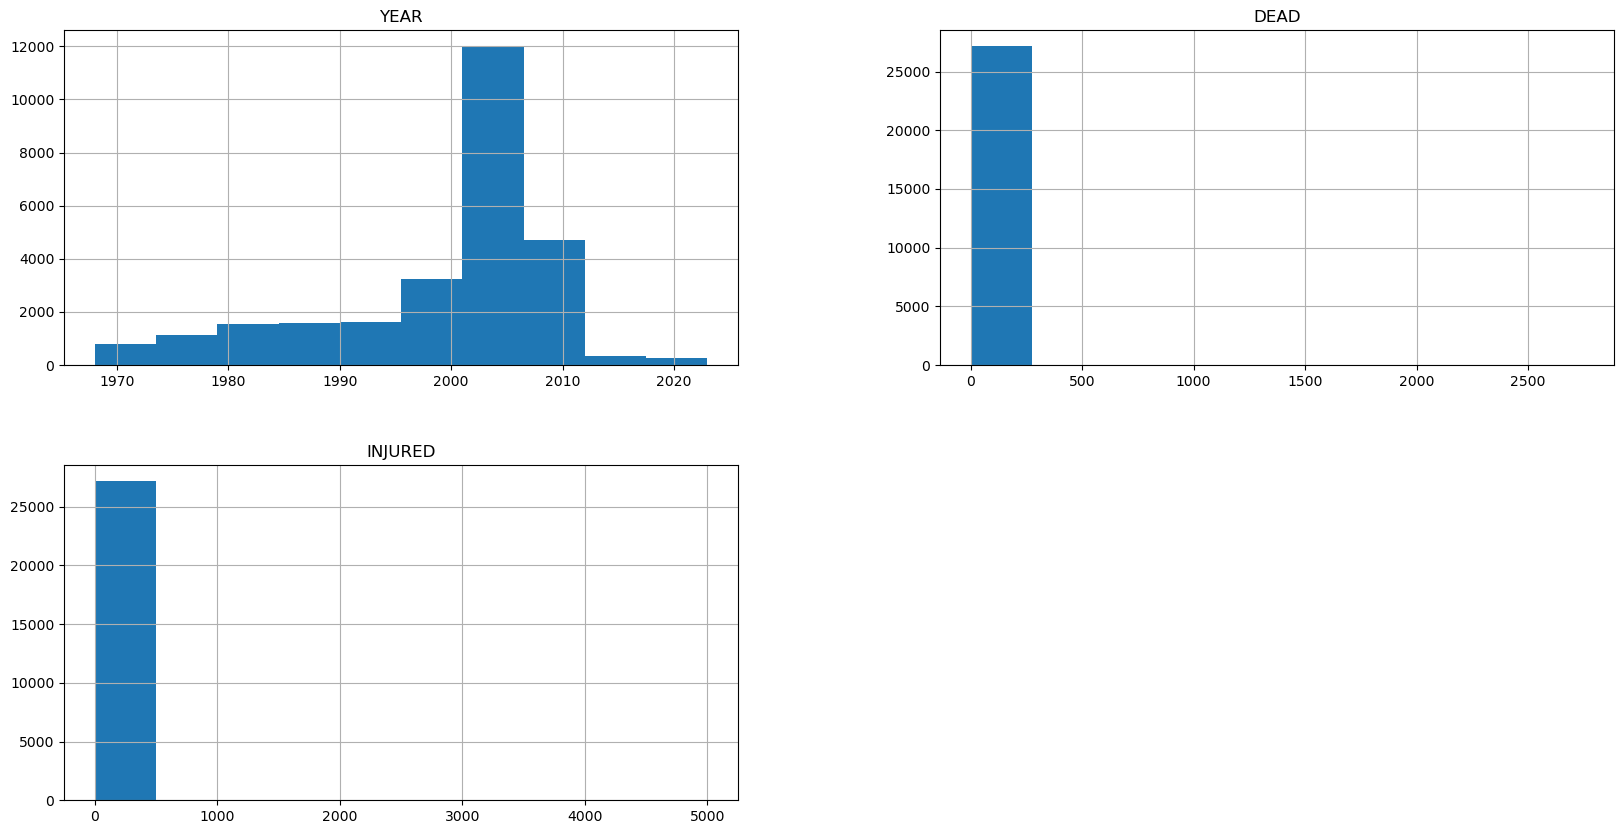

In [10]:
df.hist(figsize=(20,10))  # This represents  the distribution of data  on each series in the DataFrame.

<Axes: >

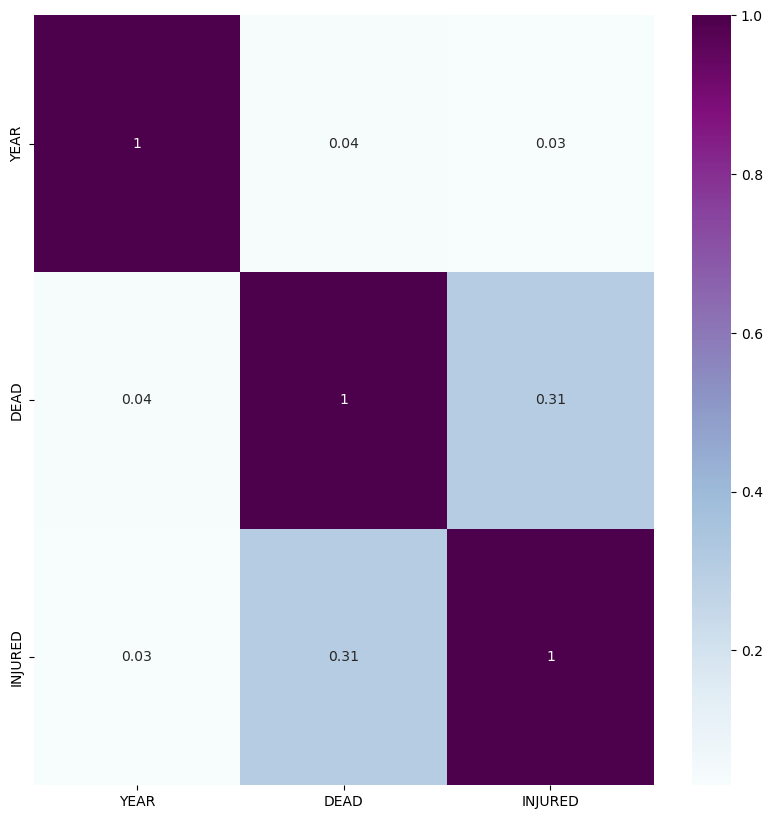

In [27]:
plt.figure(figsize=(10,10))
#This shows how much related is one parameter to the other in the dataset. 
sns.heatmap(np.round(df.corr(),2),annot=True, cmap='BuPu')

Text(0, 0.5, 'Incidents')

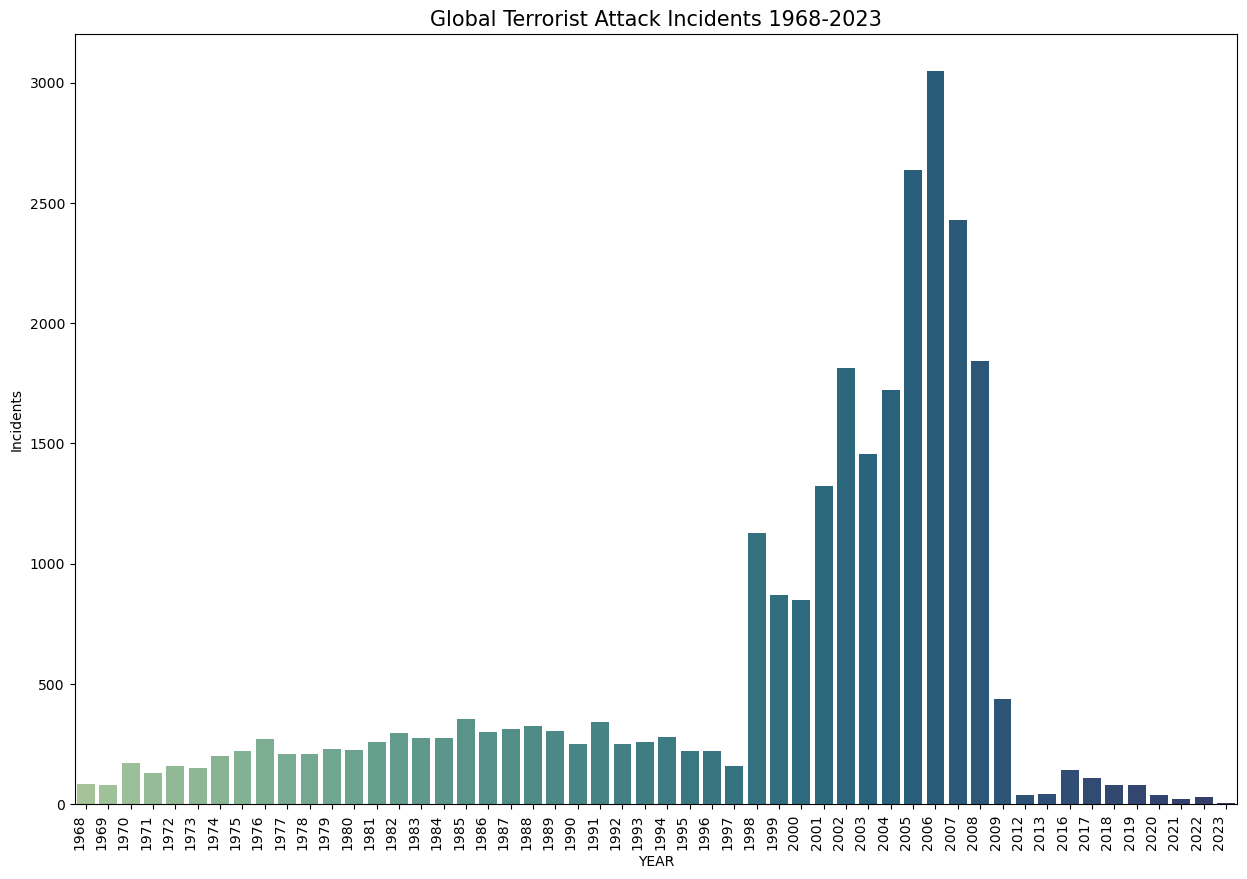

In [12]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='YEAR',data=df,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1968-2023',size=15)
plt.ylabel('Incidents')

86 attacks happened in 1968 & 7 attacks happened in 2023
So the number of attacks from 1968 has decreased by 1129.0 % till 2023


Text(0, 0.5, 'Count of YEAR')

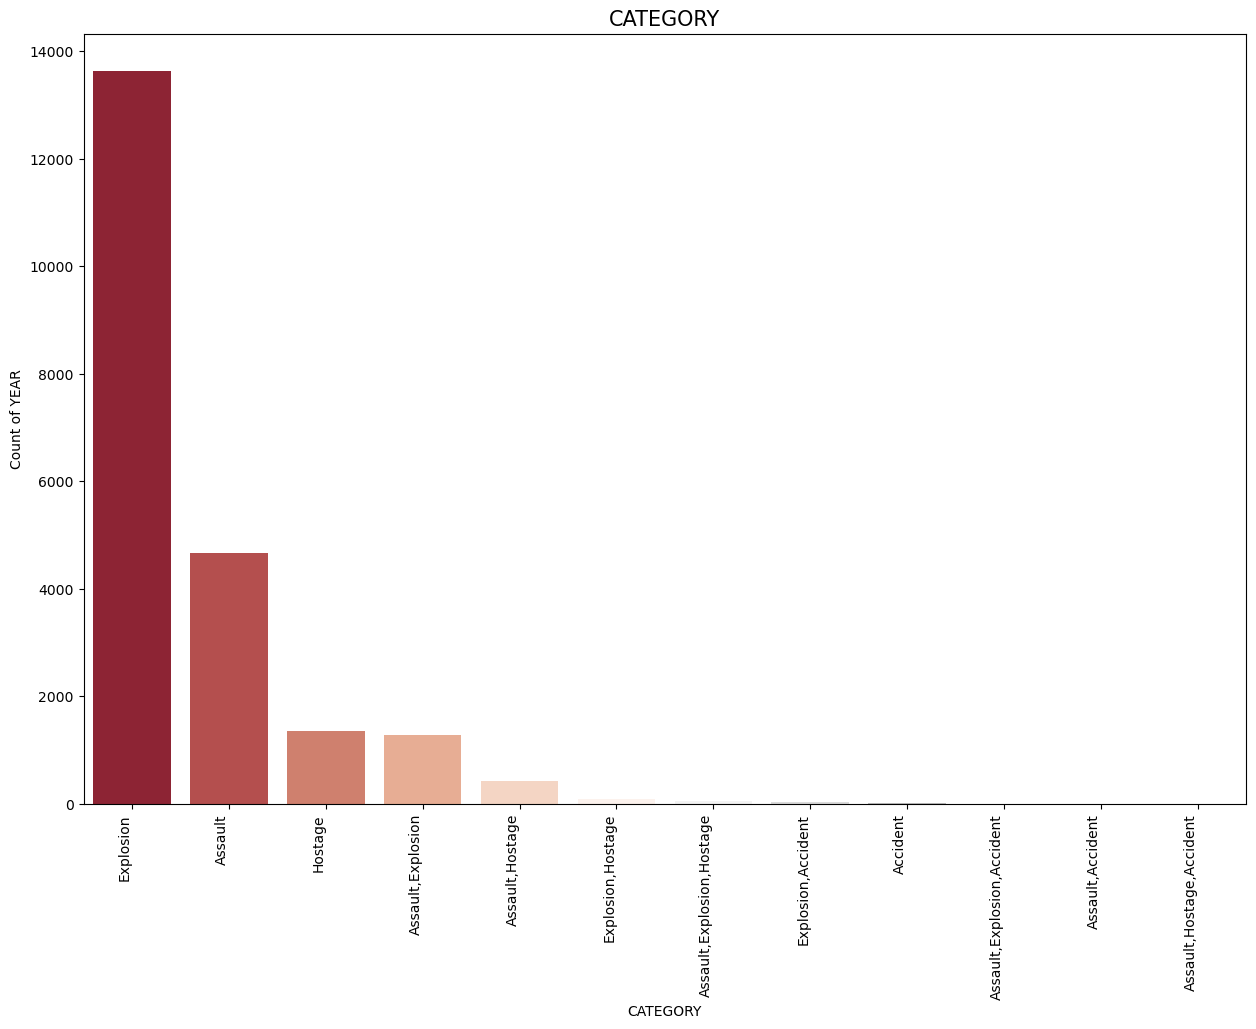

In [13]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='CATEGORY',data=df,palette='RdGy',order = df['CATEGORY'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('CATEGORY',size=15)
plt.ylabel('Count of YEAR')

Text(0, 0.5, 'No. of Attacks')

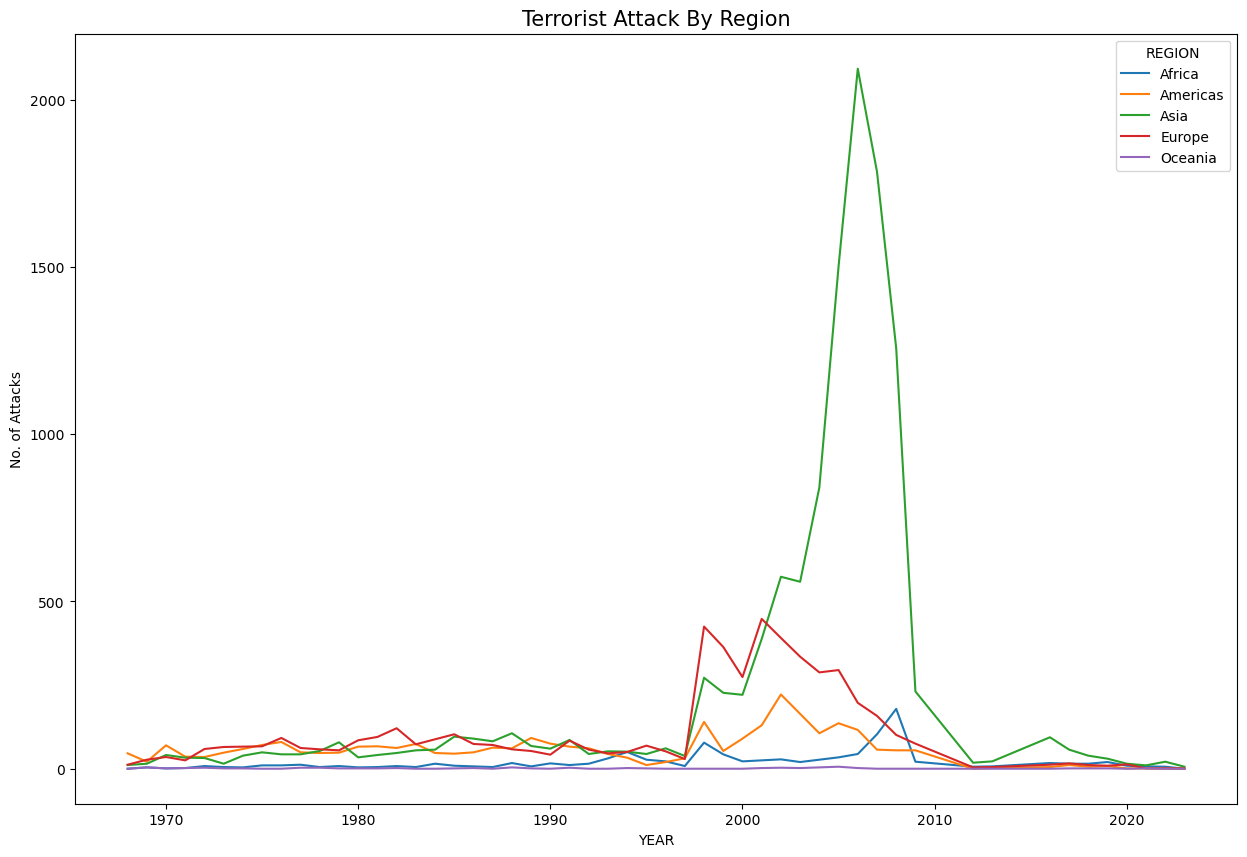

In [14]:
pd.crosstab(df.YEAR, df.REGION).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Text(0.5, 1.0, 'Top-10:Total Attacks by Country')

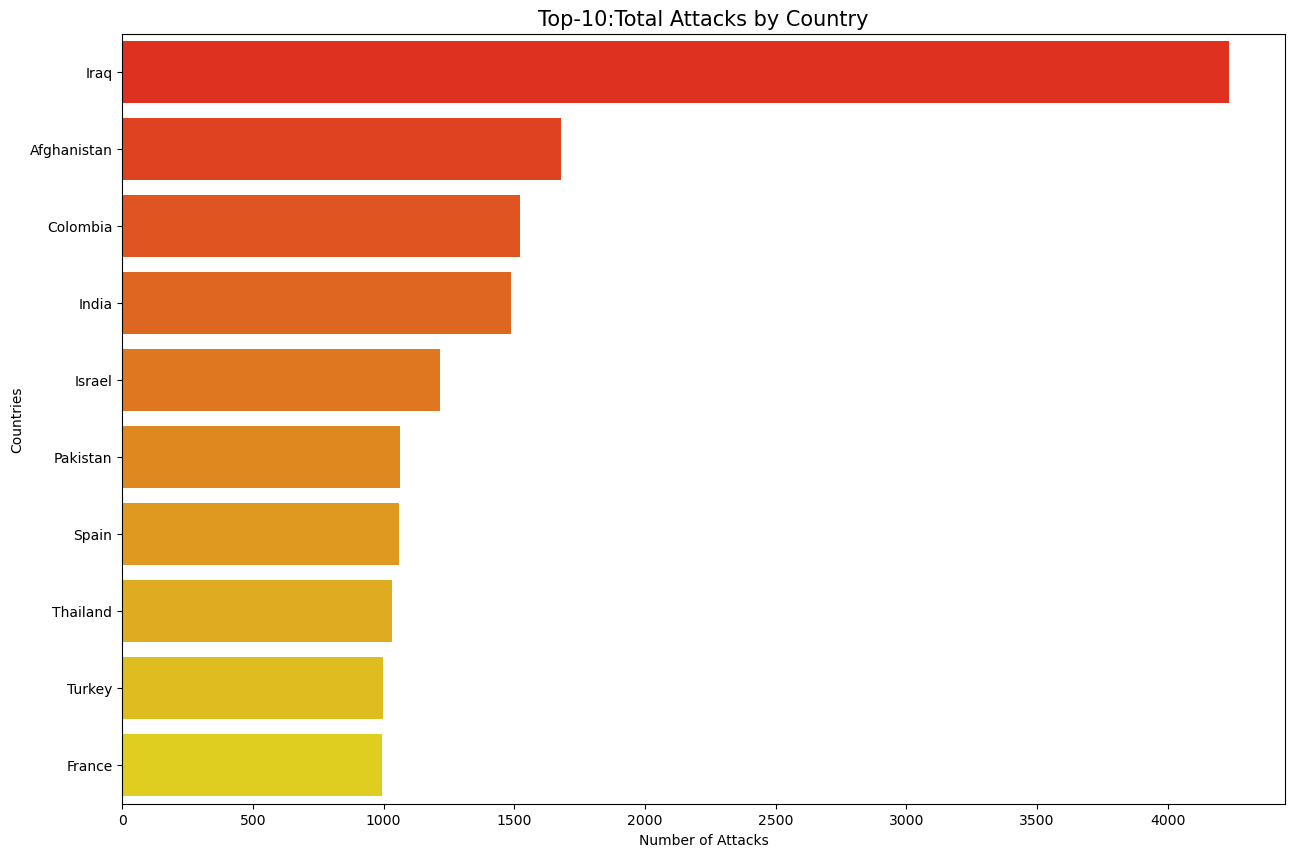

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['COUNTRY'].value_counts().values[:10], y = df['COUNTRY'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10:Total Attacks by Country',size=15)

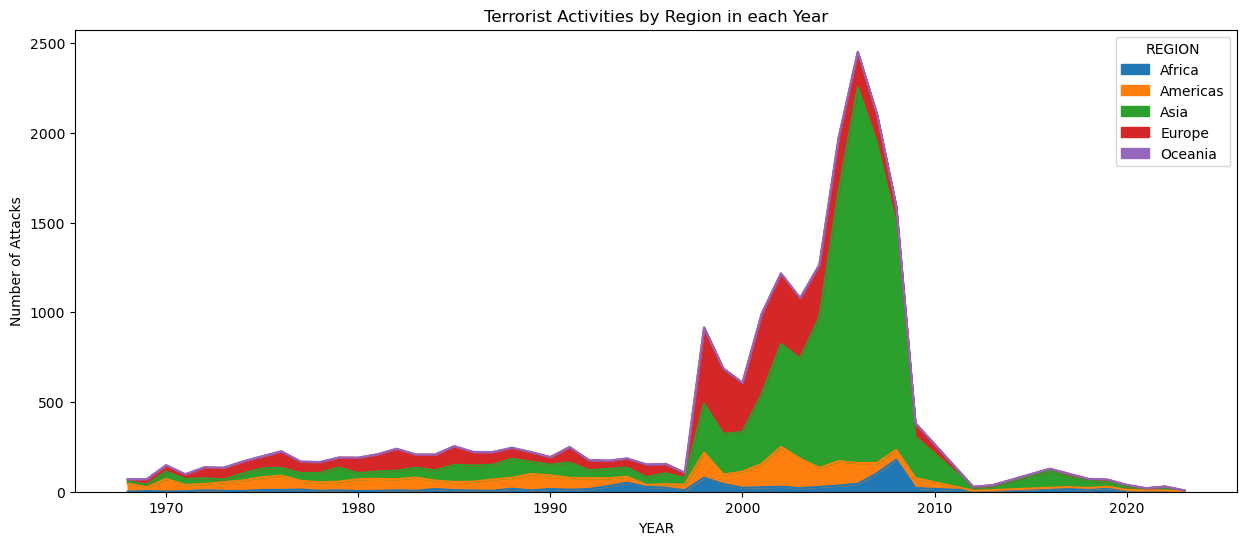

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['COUNTRY'].value_counts().values[:10], y = df['COUNTRY'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10:Total Attacks by Country',size=15)

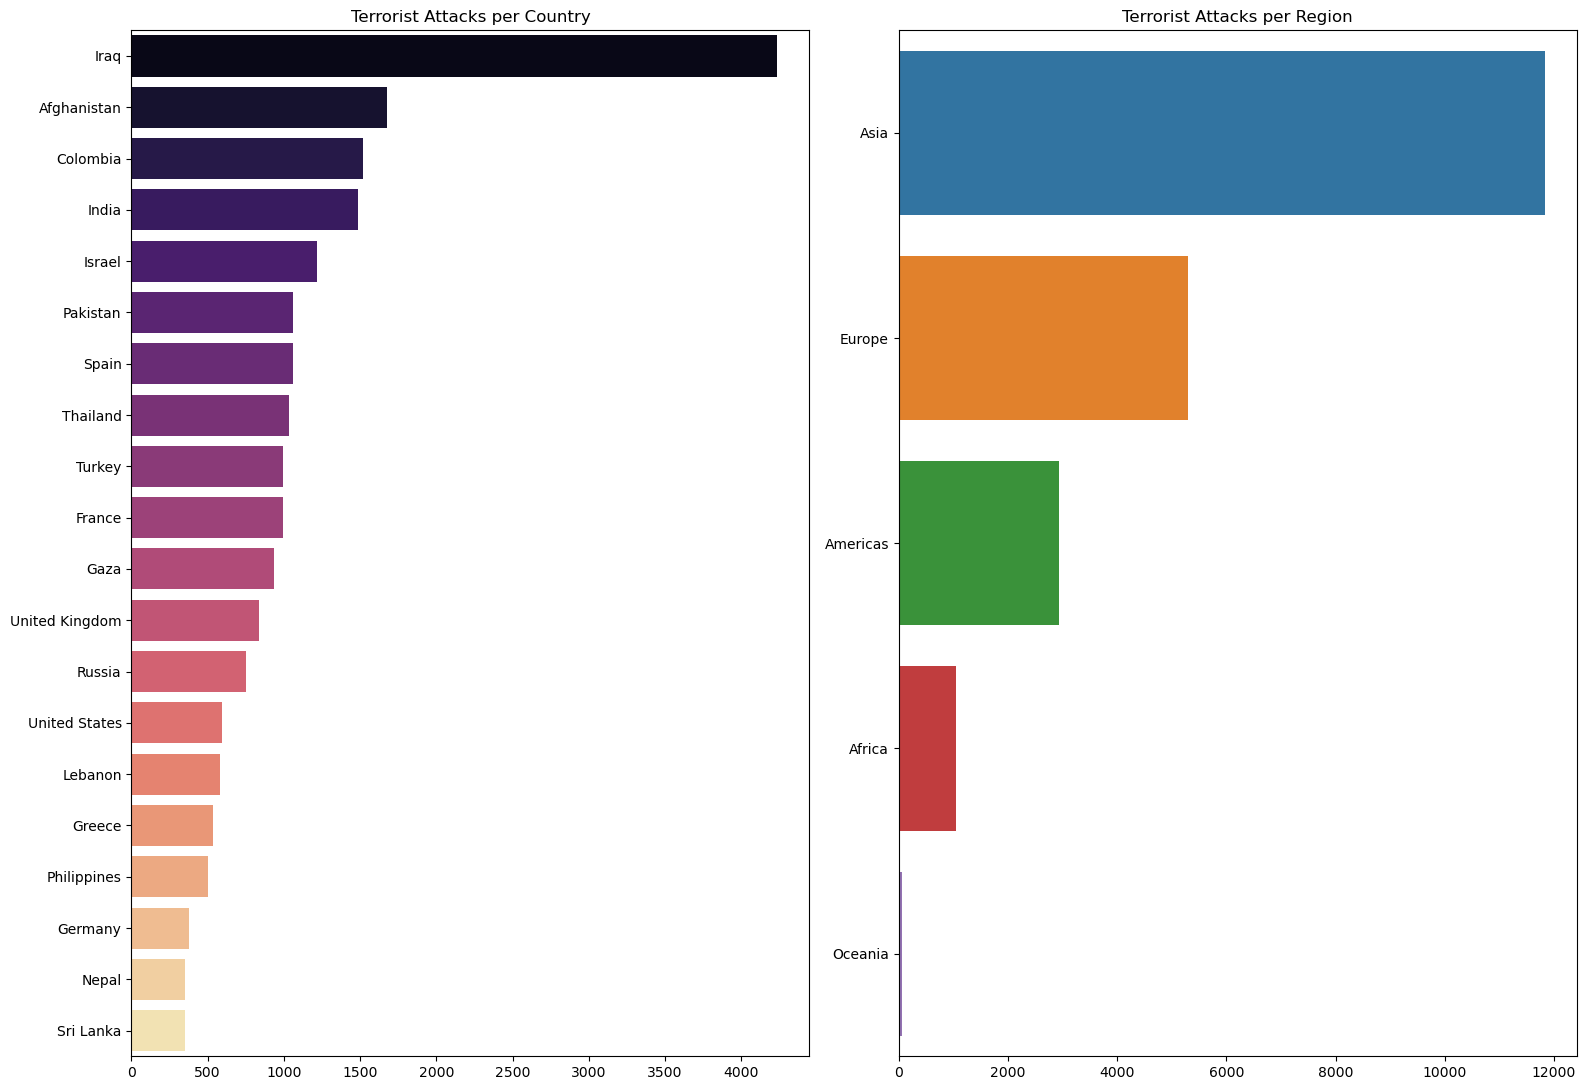

In [32]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = df['COUNTRY'].value_counts()[:20].values, y = df['COUNTRY'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=df['REGION'].value_counts().values,y=df['REGION'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

In [37]:
terr=df.groupby(['COUNTRY'],as_index=False).count()


In [38]:
max_count= terr['YEAR'].max()
max_id= terr['YEAR'].idxmax()
max_name= terr['COUNTRY'][max_id]
min_count= terr['YEAR'].min()
min_id=  terr['YEAR'].idxmin()
min_name= terr['COUNTRY'][min_id]
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 4235
Azores has suffered the minimum number of terror attacks of 1




# Thank You!!!